In [1]:
import axelrod as axl
import numpy as np

import opt_mo
import matplotlib.pyplot as plt
import matplotlib

In [2]:
import pandas as pd
from scipy import stats

In [3]:
font = {"size": 10, "weight": "bold"}
matplotlib.rc("font", **font)

In [4]:
df = opt_mo.tools.read_sql_data_frame('../data/without_gambler/main_seed_two.db')

In [5]:
df.describe()

,exp_index,first_opponent_q_1,first_opponent_q_2,first_opponent_q_3,first_opponent_q_4,second_opponent_q_1,second_opponent_q_2,second_opponent_q_3,second_opponent_q_4,mem_one_p_1,...,mem_one_cycle_length,reactive_p_1,reactive_p_2,reactive_p_3,reactive_p_4,evol_reactive_p_1,evol_reactive_p_2,evol_reactive_p_3,evol_reactive_p_4,reactive_cycle_length
count,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,...,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000,1221.000000
mean,729.909091,0.469980,0.494749,0.497273,0.491727,0.507390,0.505457,0.495098,0.503330,0.262826,...,4.076986,0.046601,0.089187,0.046601,0.089187,0.047832,0.024139,0.047832,0.024139,1.267813
std,478.673770,0.287549,0.284338,0.291871,0.288702,0.286438,0.283902,0.286319,0.286137,0.408166,...,56.921781,0.208602,0.198927,0.208602,0.198927,0.212618,0.076158,0.212618,0.076158,4.355459
min,0.000000,0.000454,0.000426,0.000538,0.001145,0.000452,0.000210,0.000403,0.000720,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,305.000000,0.216642,0.240216,0.240821,0.246747,0.259827,0.266145,0.260357,0.250431,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,649.000000,0.458254,0.497747,0.501289,0.476560,0.502215,0.513883,0.499645,0.506644,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1202.000000,0.713096,0.727109,0.748811,0.745191,0.752046,0.739070,0.739602,0.758440,0.535774,...,1.000000,0.000000,0.031261,0.000000,0.031261,0.000000,0.000000,0.000000,0.000000,1.000000
max,1560.000000,0.998462,0.999311,0.999550,0.999766,0.999834,0.999653,0.999129,0.998740,1.000000,...,1801.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.999182,1.000000,0.999182,151.000000


In [6]:
df.exp_index.tail()

1216    1556
1217    1557
1218    1558
1219    1559
1220    1560
Name: exp_index, dtype: int64

In [6]:
color = matplotlib.cm.viridis(0.3)

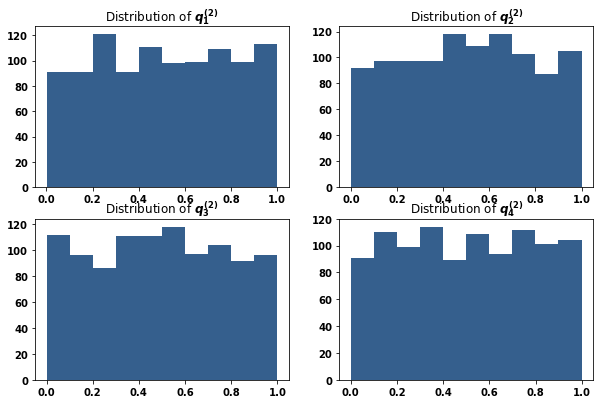

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    #axes[index].hist(df['first_opponent_q_{}'.format(i + 1)], color=colors[0], label='$q^{(1)}$')
    axes[index].hist(df['second_opponent_q_{}'.format(i + 1)], color=color);
    
    axes[index].set_title('Distribution of $q^{(2)}_%s$' % (i + 1))

plt.savefig('../img/second_opponent_probabilities.pdf')

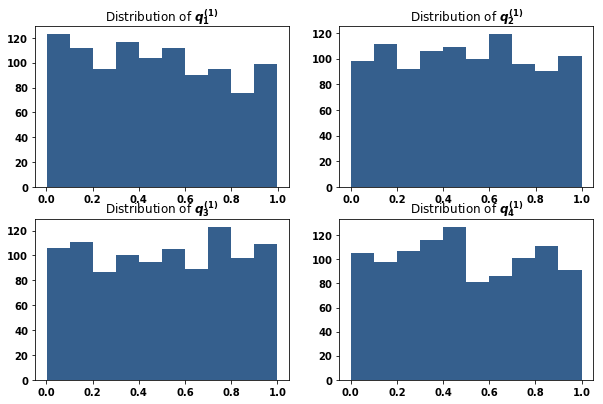

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    axes[index].hist(df['first_opponent_q_{}'.format(i + 1)], color=color)
    
    axes[index].set_title('Distribution of $q^{(1)}_%s$' % (i + 1))

plt.savefig('../img/first_opponent_probabilities.pdf')

In [9]:
df["SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["mem_one_p_1"],
            row["mem_one_p_2"],
            row["mem_one_p_3"],
            row["mem_one_p_4"],
        ]
    ),
    axis=1,
)

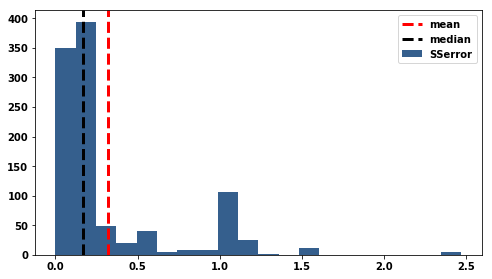

In [10]:
fig, axes = plt.subplots(figsize=(8, 4.5))

axes.hist(df["SSerror"], bins=20, color=color);
axes.axvline(
    np.mean(df["SSerror"]), color="red", linestyle="dashed", linewidth=3, label="mean"
)
axes.set_xticks(np.linspace(0, 2.5, 6))
axes.axvline(
    np.median(df["SSerror"]),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median",
)
axes.legend();

plt.savefig('../img/best_respones_sserror.pdf')

In [11]:
sserror_table = pd.DataFrame(df['SSerror'].describe(percentiles=[.25, .30, .35, .5,]))
with open("../tex/sserror_table.tex", "w") as f:
    f.write(sserror_table.to_latex())

In [12]:
sserror_table

,SSerror
count,1023.000000
mean,0.322116
std,0.388394
min,0.000000
25%,0.076284
30%,0.102444
35%,0.128244
50%,0.167952
max,2.470588


In [13]:
stats.skew(df['SSerror'])

1.9590516914659464

**Best response Evolutionary memory one (Evo)**

In [14]:
df["Evo SSerror"] = df.apply(
    lambda row: opt_mo.tools.get_least_squares(
        vector=[
            row["evol_mem_one_p_1"],
            row["evol_mem_one_p_2"],
            row["evol_mem_one_p_3"],
            row["evol_mem_one_p_4"],
        ]
    ),
    axis=1,
)

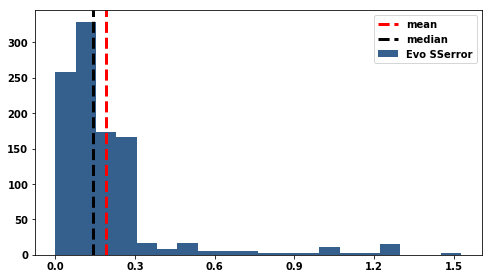

In [15]:
fig, axes = plt.subplots(figsize=(8, 4.5))

axes.hist(df["Evo SSerror"], bins=20, color=color);
axes.axvline(
    np.mean(df["Evo SSerror"]), color="red", linestyle="dashed", linewidth=3, label="mean"
)
axes.set_xticks(np.linspace(0, 1.5, 6))
axes.axvline(
    np.median(df["Evo SSerror"]),
    color="black",
    linestyle="dashed",
    linewidth=3,
    label="median",
)
axes.legend();

plt.savefig('../img/evo_sserror.pdf')

In [16]:
evo_sserror_table = pd.DataFrame(df['Evo SSerror'].describe(percentiles=[.25, .30, .35, .5]))
evo_sserror_table.iloc[3] = round(evo_sserror_table.iloc[3], 3)
with open("../tex/evo_sserror_table.tex", "w") as f:
    f.write(evo_sserror_table.to_latex())

In [17]:
evo_sserror_table

,Evo SSerror
count,1023.000000
mean,0.189929
std,0.219760
min,0.000000
25%,0.075918
30%,0.097995
35%,0.113404
50%,0.140975
max,1.529412


In [18]:
stats.skew(df['Evo SSerror'])

3.331767114850435

In [19]:
from scipy import stats

- Sample distributions are equal. **Fail to Reject $h_0$**

- Sample distributions are not equal. **Reject $h_0$** 

In [20]:
def t_test(sample_one, sample_two, alpha=0.05):
    t, p = stats.ttest_ind(sample_one, sample_two)
    
    if p > alpha:
        print(r'Fail to reject $h_0$')
    else:
        print(r'Reject $h_0$')
        
    return p

In [21]:
def test_ranksum(sample_one, sample_two, alpha=0.05):
    _, p = stats.ranksums(df['SSerror'], df['Evo SSerror'])
    
    if p > alpha:
        print(r'Fail to reject $h_0$')
    else:
        print(r'Reject $h_0$')
    return p

In [22]:
p = t_test(df['SSerror'], df['Evo SSerror'])

Reject $h_0$


In [23]:
round(p, 10)

0.0

In [24]:
p = test_ranksum(df['SSerror'], df['Evo SSerror'])

Reject $h_0$


In [25]:
round(p, 12)

2.79e-10

**The actual behaviour**

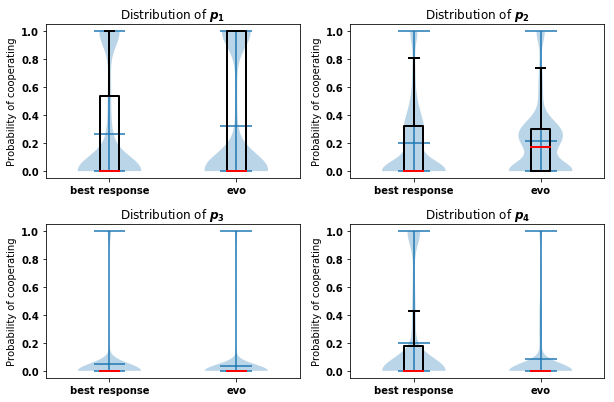

In [26]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)

    axes[index].violinplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]],
        showmeans=True,
    )
    boxes = axes[index].boxplot(
        [df["mem_one_p_{}".format(i + 1)], df["evol_mem_one_p_{}".format(i + 1)]], showfliers=False
    )
    for bp in boxes['medians']:
        bp.set_color('red')
        bp.set_linewidth(2)
    for bp in boxes['caps']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['whiskers']:
        bp.set_color('black')
        bp.set_linewidth(2)
    for bp in boxes['boxes']:
        bp.set_color('black')
        bp.set_linewidth(2)

    axes[index].set_title('Distribution of $p_%s$' % (i + 1), fontweight= 'medium')
    axes[index].set_ylabel('Probability of cooperating', fontweight= 'medium')
    matplotlib.pyplot.subplots_adjust(wspace = 0.2, hspace = 0.3)

    plt.setp(axes[index], xticks=[1, 2], xticklabels=["best response", "evo"])
    
plt.savefig('../img/behaviour_violin_plots.pdf')

In [27]:
means = []
for i in range(4):
    means.append((np.median(df['mem_one_p_{}'.format(i + 1)]),
                  np.median(df['evol_mem_one_p_{}'.format(i + 1)]),
                  round(test_ranksum(df['mem_one_p_{}'.format(i + 1)], df['evol_mem_one_p_{}'.format(i + 1)]), 3)))

Reject $h_0$
Reject $h_0$
Reject $h_0$
Reject $h_0$


In [28]:
tests_table = pd.DataFrame(means, columns=['Memory one Median', 'Evo Median', 'p-values'])

In [29]:
tests_table.index = ['Distribution $p_1$', 'Distribution $p_2$', 'Distribution $p_3$', 'Distribution $p_4$']

In [30]:
tests_table

,Memory one Median,Evo Median,p-values
Distribution $p_1$,0.0,0.000000,0.0
Distribution $p_2$,0.0,0.174359,0.0
Distribution $p_3$,0.0,0.000000,0.0
Distribution $p_4$,0.0,0.000000,0.0


In [50]:
with open("../tex/medians_tests.tex", "w") as f:
    f.write(tests_table.to_latex())

In [51]:
distances = [
    [
        (row["evol_mem_one_p_{}".format(p + 1)] - row["mem_one_p_{}".format(p + 1)])
        for _, row in df.iterrows()
    ]
    for p in range(4)
]

In [52]:
labels = ["$p_1$", "$p_2$", "$p_3$", "$p_4$"]

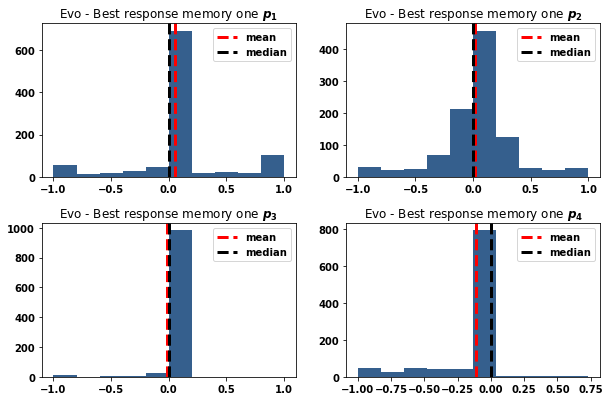

In [58]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
for i, distance in enumerate(distances):
    index = (int(i / 2), i % 2)

    axes[index].hist(distance, color=color)
    axes[index].axvline(
        np.mean(distance), color="red", linestyle="dashed", linewidth=3, label="mean"
    )
    axes[index].axvline(
        np.median(distance),
        color="black",
        linestyle="dashed",
        linewidth=3,
        label="median",
    )
    axes[index].set_title("Evo - Best response memory one %s" %labels[i])
    axes[index].legend()
    matplotlib.pyplot.subplots_adjust(wspace = 0.2, hspace = 0.3)
    
plt.savefig('../img/distances.pdf')

In [59]:
skew = []
for distance in distances:
    skew.append(stats.skew(distance))

In [60]:
skew

[0.22054582293705985,
 -0.10564806021678827,
 -7.0010844932162035,
 -1.937355725791657]

In [36]:
skew_table = pd.DataFrame(skew, columns=['Distance Skewness'])
skew_table.index = [r'$p_1$ difference', r'$p_2$ difference', r'$p_3$ difference', r'$p_4$ difference']

In [37]:
with open("../tex/skew_table.tex", "w") as f:
    f.write(skew_table.to_latex())

**Regression**

In [38]:
import seaborn as sbn
from sklearn.linear_model import LinearRegression

In [39]:
correlation = df[df.columns[1:-16]].corr().round(2)

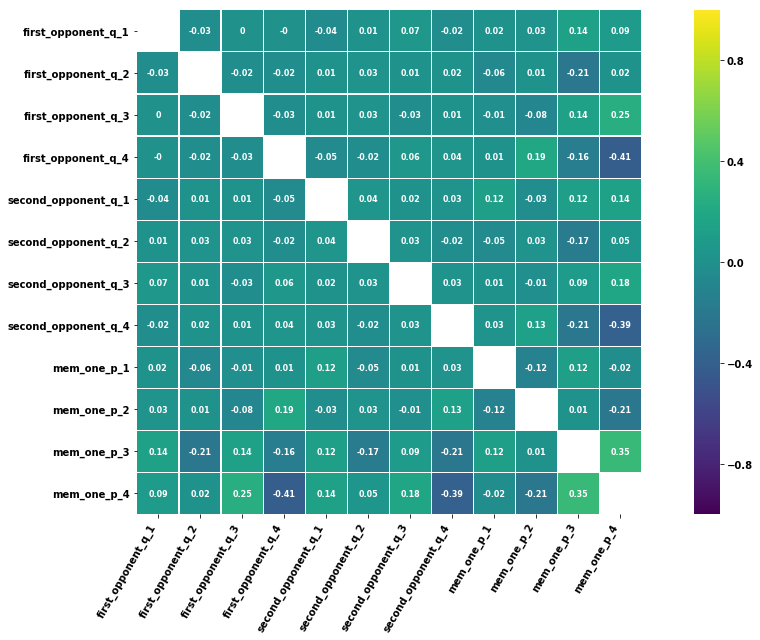

In [40]:
fig, ax = plt.subplots(1, figsize=(15, 9))

sbn.heatmap(
    correlation.replace(1, np.nan), square=True, cmap='viridis', vmin=-1, vmax=1,
    lw=0.1, annot=True, annot_kws={'fontsize': 8}, ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(60)
    label.set_horizontalalignment('right')

plt.tight_layout()

plt.savefig('../img/best_response_correlation.pdf')

In [41]:
columns = list(df.columns[1:-20]) + list(df.columns[13:17])

In [42]:
correlation = df[columns].corr().round(2)

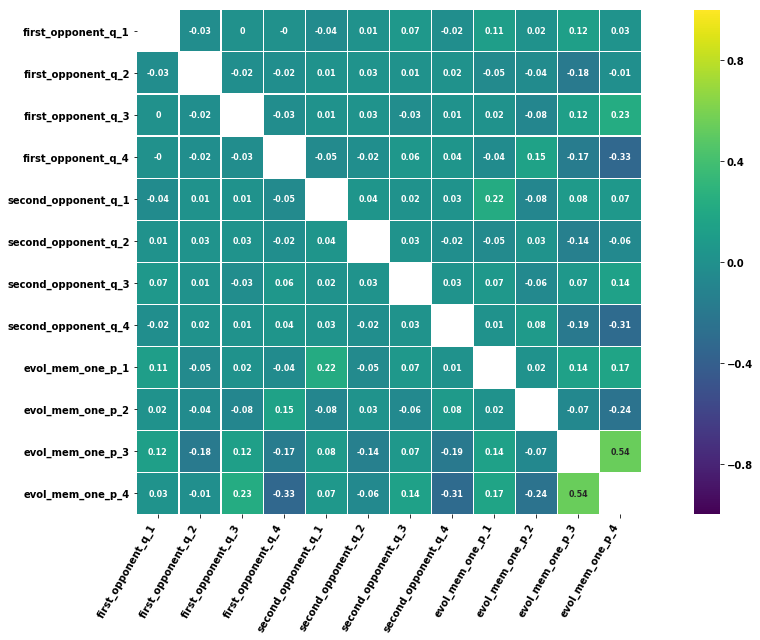

In [43]:
fig, ax = plt.subplots(1, figsize=(15, 9))

sbn.heatmap(
    correlation.replace(1, np.nan), square=True, cmap='viridis', vmin=-1, vmax=1,
    lw=0.1, annot=True, annot_kws={'fontsize': 8}, ax=ax)

for label in ax.get_xticklabels():
    label.set_rotation(60)
    label.set_horizontalalignment('right')

plt.tight_layout()

plt.savefig('../img/evo_correlation.pdf')

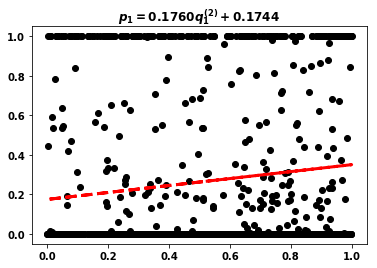

In [44]:
x = df['second_opponent_q_1']
y = df['mem_one_p_1']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.plot(x, y, 'o', color='black')
plt.plot(x, line, '--', color='red', linewidth=3);

plt.title(r'$p_1 = %.4f q^{(2)}_{1} + %.4f$' % (slope, intercept));

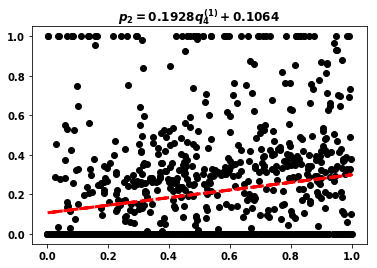

In [45]:
x = df['first_opponent_q_4']
y = df['mem_one_p_2']

slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept

plt.plot(x, y, 'o', color='black')
plt.plot(x, line, '--', color='red', linewidth=3);

plt.title(r'$p_2 = %.4f q^{(1)}_{4} + %.4f$' % (slope, intercept));


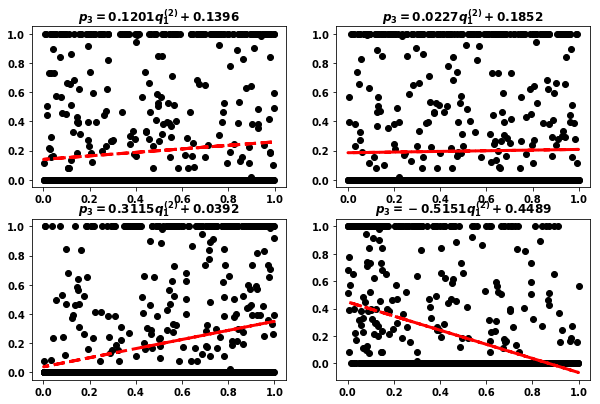

In [46]:
y = df['mem_one_p_4']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))

for i in range(4):
    index = (int(i / 2), i % 2)
    x = df['first_opponent_q_{}'.format(i + 1)]


    slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
    line = slope * x + intercept

    axes[index].plot(x, y, 'o', color='black')
    axes[index].plot(x, line, '--', color='red', linewidth=3);

    axes[index].set_title(r'$p_3 = %.4f q^{(2)}_{1} + %.4f$' % (slope, intercept));

Arcooding to (Knight 2019), a method for testing for extortionate behaviour has been given. Though there is a n exact condition that must hold regarding a player transition probabilities. A more slacked definition is also given. Regarding the slack defitition the error of being a ZD strategy is defined.

In [47]:
# ratios = []
# for p in range(4):
#     ratio = []
#     for _, row in df.iterrows():
#         try:
#             ratio.append(
#                 row["mem_one_p_{}".format(p + 1)]
#                 / row["evol_mem_one_p_{}".format(p + 1)]
#             )
#         except ZeroDivisionError:
#             pass
#     ratios.append(ratio)

In [48]:
# fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 6.5))
# for i, ratio in enumerate(ratios):
#     index = (int(i / 2), i % 2)

#     axes[index].hist(ratio)
#     axes[index].axvline(
#         1, color="red", linestyle="dashed", linewidth=2, label="ratio=1"
#     )
#     axes[index].set_title(labels[i])
#     axes[index].legend()